# House Price Predictor
#### Author: Anusha Ramachandran

---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<a id="Description"></a>
## Project description

You will develop a multiple linear regression model to predict sale price of houses (\\$ CAD) in Vancouver using the following potential candidate quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.  

Assume that we are trying to predict sale price for the same time period that the data was collected. Consider how predicting sale price could be valuable for realtors representing both house sellers and house buyers.  

### Methods  
  
First, you will divide the dataset into a training set and a validation set. You will use the training set to develop your model. You can transform variables as appropriate. Note that if you transform age using a power transformation or a log transformation, you should add 1 year to all the values of age first.   
  
You will conduct exploratory data analysis, visualizing the relationships between the variables. You should include code for visualizing appropriate transformations at the end of the project.  

In the main part of the project, you will present the results of your best model (referred to as the final model), which you will choose by considering the following:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

Before creating any models, you should consider is the objective and which variables you would have access to when attempting to use the model to create predictions.

At the end of the project, you should include code for any other candidate models that you considered. 
  
You will discuss the strengths and limitations of your final model, and provide any recommendations to address the limitations.

---

### Make sure that your code is organized. Includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (1 mark)
---

<a id="Introduction"></a>
# Introduction (300 words max.) (2.5 marks) - Part A

What to include: objective and purpose of the analysis, background information, and the benefit of having and using a model to accurately predict price.  
  
If you include any references, please put the bibliographical information (APA style) at the end of your introduction; this does not contribute to the word count.
</code> 

---

## Objective and Purpose of analysis

The objective of the analysis is to create a regression model for predicting housing prices accurately- thus benefiting both realtors buying and selling the houses.

## Background Information

As the third largest city in Canada, Vancouver is receiving a large number of investments from all over the world from year to year, and housing is one of the most important trades. However, the price of houses in Vancouver had been fluctuating over time. Therefore, we will use the data collected from detached homes in 2019 and early 2020 on the real estate market in Vancouver to conduct an analysis regarding house prices in Vancouver.

In this project, we will develop a multiple linear regression model to explore the relationship between days on market, total floor area, age, lot size, and house prices in Vancouver, as well as use the relationship we found to predict the house price. 

## Benefit of using a model

Using this multiple linear regression model will allow people to have a better knowledge of the factors that are influencing house prices, help to improve the accuracy of price predictions, and enables the realtors to cope with price volatility, which is an essential parameter in the price assessment in long run. In this case, the investors can have a better target on alternatives and prediction of price and use the model to determine what price to offer. It would also help the sellers to have a better estimation of the selling price, thus, eliminating the discrepancies and facilitating transparency in the market.

In [148]:
# Import the data:
mydata <- read.csv(file="House sale data Vancouver.csv", header=TRUE)

---
*The dataset includes the following variables:*
- Number: if your observations get out of order, please sort by Number to get them back in the correct order so that everyone will work with the same training set and validation set.
- Address: Address of the house.
- List.Date: The date that the house was listed for sale
.
- Price: The final sale price of the house (\\$ CAD). Note that this may differ from what the original asking price was.
- Days.on.market: how many days the house was on the market before it sold.
- Total.floor.area: the total area in square feet of the finished living space, including kitchen, bathrooms, living room, bedrooms, etc. on all floors of the house
- Year.Built: the year when the house was built.
- Age: calculated from Year.Built to represent the house age around the time of sale.
- Lot.size: the size of the lot in square feet. This includes the area of the footprint of the house, and the area of any yard or garden.
---

In [149]:
# Create a training set and a validation set using the following code
# This will divide the dataset into ~80% training set (1042 observations)
# and ~ 20% validation set (260 observations)

# DO NOT MODIFY THIS CODE!

mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]

---
<a id="EDA"></a>
# Exploratory data analysis (4 marks) - Part A

</code> 


## --------------------------------------Price vs Days on Market ----------------------------------

[1] 1.213833e-05


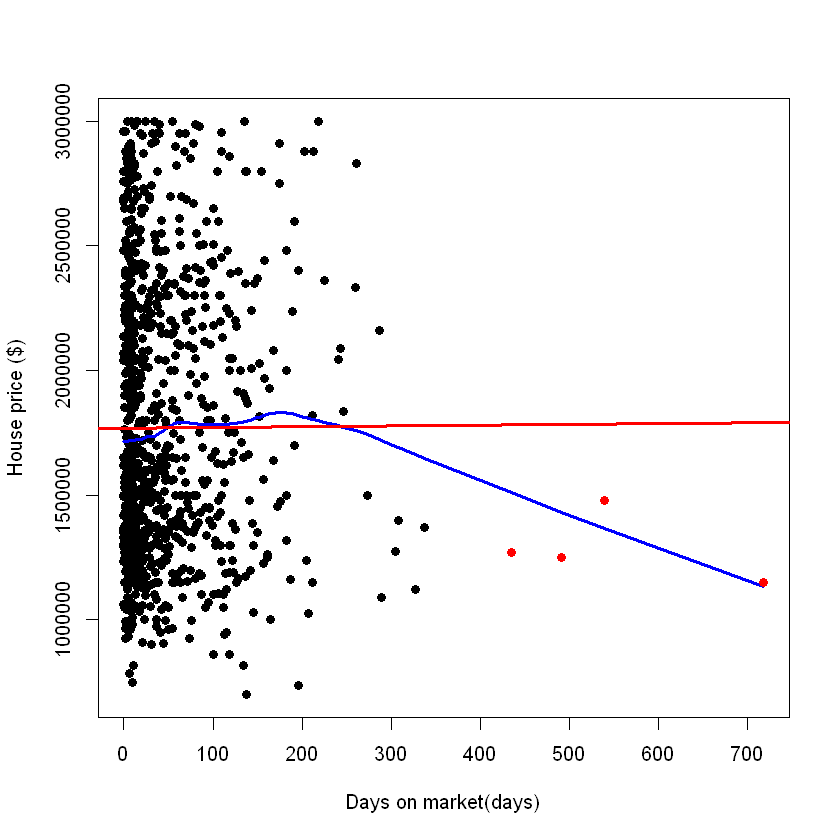

In [150]:
plot(mydata.train$Days, mydata.train$Price, xlab="Days on market(days)", ylab="House price ($)", pch = 16)

#drawing lowess line
lines(lowess(mydata.train$Days, mydata.train$Price), col = "blue", lwd = 3)

#drawing abline
abline(lm(mydata.train$Price ~ mydata.train$Days), col = "red", lwd = 3)

#marking outliers
points(x=mydata.train$Days[mydata.train$Days>400],y=mydata.train$Price[mydata.train$Days>400],col='red',pch=16)

#correlation, used to find strength 
print(cor(mydata.train$Days, mydata.train$Price)^2)

## Association for Price vs. Days on Market
#### Form: No obvious association between days on market and house price. 
#### Direction: the lowess line heads slightly downward.
#### Strength: the strength of the association is very weak, since r^2 is only 1.213833e-05
#### Outliers: While most houses listed in the dataset form a cluster when talking about the Days on market-Price relationship, there are a few which have been on the market for more than 400 days. These datapoints form the outliers. Potential reasons of why these are unable to be sold, causing to be out of the cluster of points can be: Distance of house from commonly accessed spots, lesser advertising perhaps, unavailability of transportation etc. 

## ------------------------------- Price vs. Floor Area------------------------------------

[1] 0.3423318


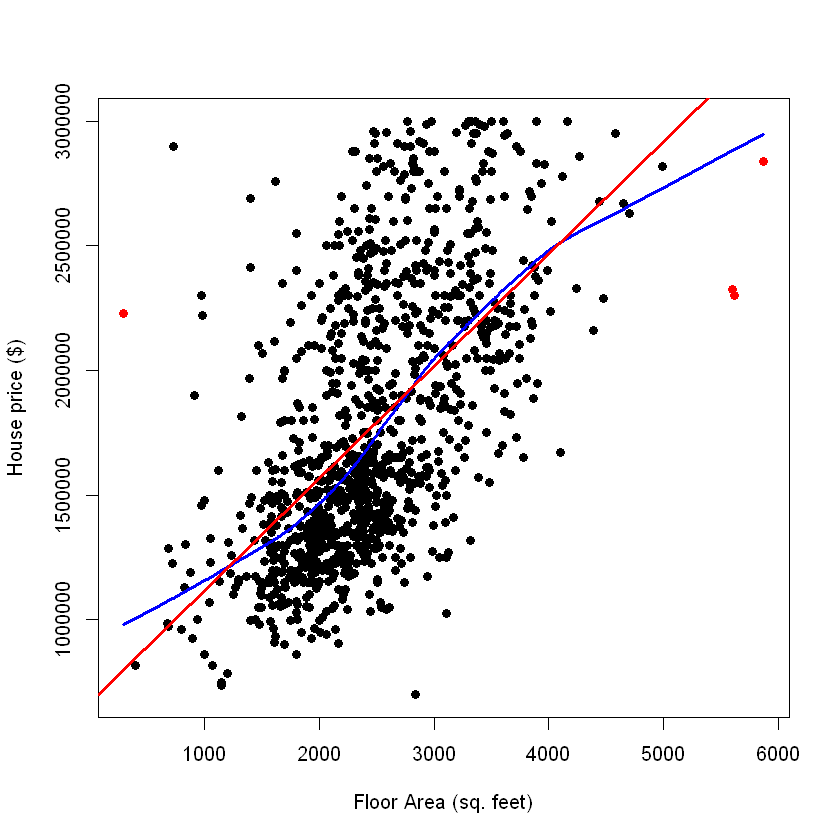

In [151]:
plot(mydata.train$Total.floor.area, mydata.train$Price, xlab="Floor Area (sq. feet)", ylab="House price ($)", pch = 16)

#drawing lowess line
lines(lowess(mydata.train$Total.floor.area, mydata.train$Price), col = "blue", lwd = 3)

#drawing abline
abline(lm(mydata.train$Price ~ mydata.train$Total.floor.area), col = "red", lwd = 3)

#marking outliers
points(x=mydata.train$Total.floor.area[mydata.train$Total.floor.area>5000],y=mydata.train$Price[mydata.train$Total.floor.area>5000],col='red',pch=16)
points(x=mydata.train$Total.floor.area[mydata.train$Total.floor.area<400],y=mydata.train$Price[mydata.train$Total.floor.area<400],col='red',pch=16)

#correlation, used to find strength 
print(cor(mydata.train$Total.floor.area, mydata.train$Price)^2)

## Association for Price vs. Total Floor Area
#### Form: there is linear relationship between floor area and house price. From range between 2000-4000 sq ft, the lowess line is steeper than the slope in range 0-2000 and 4000-6000 sq.ft.
#### Direction: there is positive relationship because the lowess line goes upward.
#### Strength: r^2 is 0.3423318, so the correlation is moderate. 
#### Outliers: Some of the outliers seen in this relationship are the ones with either extremely large or small floor area. Outliers from both of these categories can be seen at a considerably high house price range. Some of the reasons why these points are not a part of the main cluster could be: people aren't willing to buy very small houses for an exobirtant price, the higher area-higher price ones might be located in a suburban area where people might not want such huge houses and it might not make sense from a financial standpoint to invest in such far off places

## --------------------------------- Price vs. Housing Age------------------------------------

[1] 0.05596746


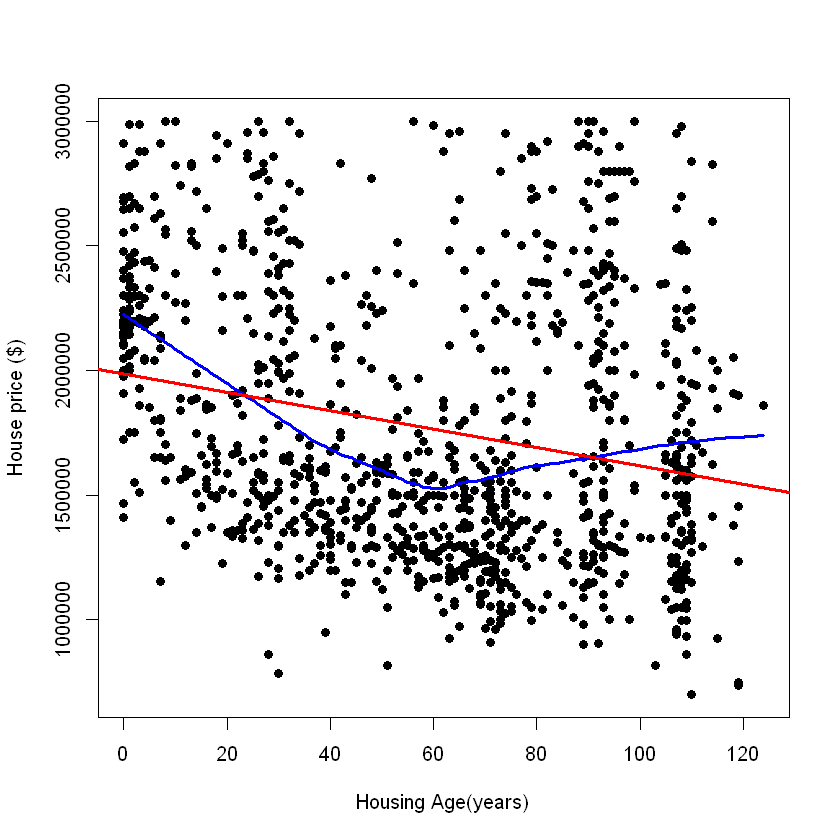

In [152]:
plot(mydata.train$Age, mydata.train$Price, xlab="Housing Age(years)", ylab="House price ($)", pch = 16)

#drawing lowess line
lines(lowess(mydata.train$Age, mydata.train$Price), col = "blue", lwd = 3)

#drawing abline
abline(lm(mydata.train$Price ~ mydata.train$Age), col = "red", lwd = 3)

#correlation, used to find strength 
print(cor(mydata.train$Age, mydata.train$Price)^2)

## Association for Price vs. Housing Age
#### Form: there is no obvious linear relationship between housing age and house price.The lowess line decreased until about 60, then increases. 
#### Direction: there is a slight negative relationship, because abline heads slightly downward.
#### Strength: the correlation is relatively weak, because r^2 is only 0.05596746.
#### Outliers: There are no visible outliers in this relationship showing that people are either not concerned about the age of the house (as long as it is perhaps visibly beautiful) or the houses listed, irrespective of the age are in good condition. We can say so because we can see that in all the housing age areas, there are houses in a range of prices from low to high.

## --------------------------------- Price vs. Lot Size------------------------------------

[1] 0.1633547


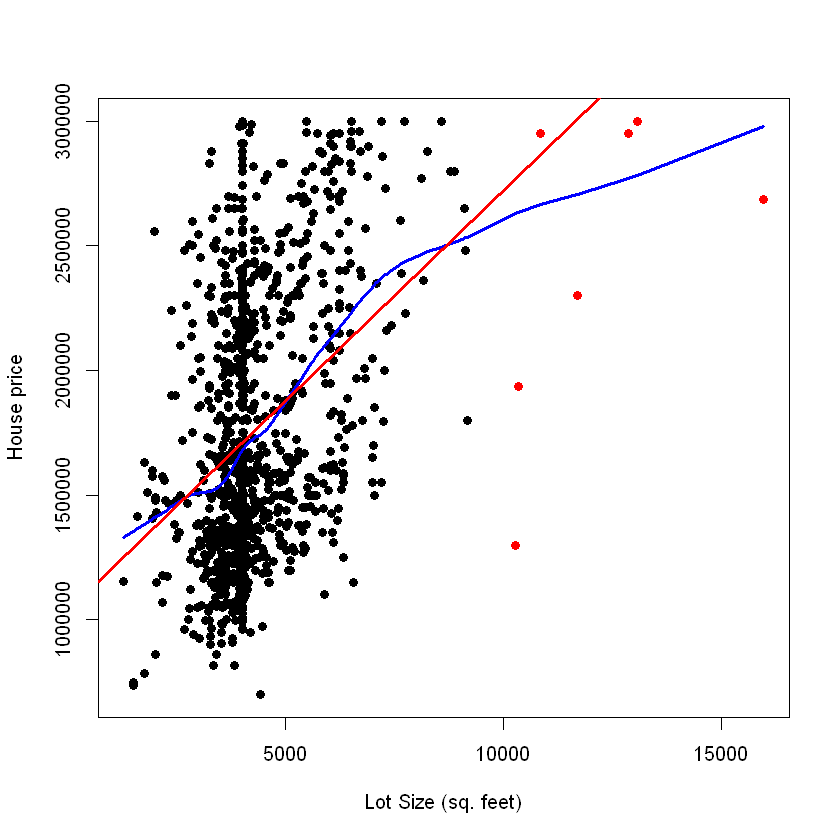

In [153]:
plot(mydata.train$Lot.Size, mydata.train$Price, xlab="Lot Size (sq. feet)", ylab="House price", pch = 16)

#drawing lowess line
lines(lowess(mydata.train$Lot.Size, mydata.train$Price), col = "blue", lwd = 3)

#drawing abline
abline(lm(mydata.train$Price ~ mydata.train$Lot.Size), col = "red", lwd = 3)

#marking outliers
points(x=mydata.train$Lot.Size[mydata.train$Lot.Size>10000],y=mydata.train$Price[mydata.train$Lot.Size>10000],col='red',pch=16)

#correlation, used to find strength 
print(cor(mydata.train$Lot.Size, mydata.train$Price)^2)

## Association for Price vs. Lot Size
#### Form: the lowess line is almost straight, so there is a linear relationship between lot size and house price.
#### Direction: lowess line and abline head up, so there is a positive relationship.
#### Strength: the correlation between lot size and house price is relatively weak, because r^2 is only  0.1633547.
#### Outliers: The outliers in this relationship are essentially more than 10,000 sq. feet in lot size. We can see that some of the houses have a ton of lot size and the price is also quite high. People might not be interested in such places because the area might not be utilized properly or the house might not be architectured in the right manner leaving the renter feel inconvenient. The ones with medium price but high lot size might not be ideal for people who are working and don't have the time to maintain such a large area.

---
<a id="Model_fit"></a>
# Model fit to training data, checking assumptions


In [154]:
# Add any transformations to the training dataset:

In [215]:

#creating log transformed variables
mydata.train$days.log <- log(mydata.train$Days +1)
mydata.train$floor.area.log <- log(mydata.train$Total.floor.area)
mydata.train$age.log <- log(mydata.train$Age + 1)
mydata.train$lot.size.log <- log(mydata.train$Lot.Size)

#creating sqrt transformed variables
mydata.train$days.sqrt <- sqrt(mydata.train$Days)
mydata.train$floor.area.sqrt <- sqrt(mydata.train$Total.floor.area)
mydata.train$age.sqrt <- sqrt(mydata.train$Age)
mydata.train$lot.size.sqrt <- sqrt(mydata.train$Lot.Size)

#creating square transformed variables
mydata.train$days.sq <- (mydata.train$Days)^2
mydata.train$floor.area.sq <- (mydata.train$Total.floor.area)^2
mydata.train$age.sq <- (mydata.train$Age)^2
mydata.train$lot.size.sq <- (mydata.train$Lot.Size)^2 

#creating fraction transformed variables
mydata.train$days.fraction <- 1/(mydata.train$Days)
mydata.train$floor.area.fraction <- 1/(mydata.train$Total.floor.area)
mydata.train$age.fraction <- 1/(mydata.train$Age)
mydata.train$lot.size.fraction <- 1/(mydata.train$Lot.Size)

mydata.train$Price.log <- log(mydata.train$Price)

In [156]:
# If you conducted any transformations of x or y in your final mode

In [194]:
z1 <- lm(Price ~ floor.area.sqrt + lot.size.log, data = mydata.train)
summary(z1)


Call:
lm(formula = Price ~ floor.area.sqrt + lot.size.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1249279  -323357   -83077   284247  1765443 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3432132     431660  -7.951 4.80e-15 ***
floor.area.sqrt    37149       2058  18.051  < 2e-16 ***
lot.size.log      405287      55542   7.297 5.84e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 430300 on 1039 degrees of freedom
Multiple R-squared:  0.3626,	Adjusted R-squared:  0.3614 
F-statistic: 295.6 on 2 and 1039 DF,  p-value: < 2.2e-16


In [195]:
z2 <- lm(Price ~ floor.area.sqrt + lot.size.log + floor.area.sqrt*lot.size.log, data = mydata.train)
summary(z2)


Call:
lm(formula = Price ~ floor.area.sqrt + lot.size.log + floor.area.sqrt * 
    lot.size.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1248219  -322120   -83387   285607  1778619 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                  -2858775    2483267  -1.151    0.250
floor.area.sqrt                 25485      49789   0.512    0.609
lot.size.log                   336799     297348   1.133    0.258
floor.area.sqrt:lot.size.log     1391       5931   0.234    0.815

Residual standard error: 430500 on 1038 degrees of freedom
Multiple R-squared:  0.3627,	Adjusted R-squared:  0.3608 
F-statistic: 196.9 on 3 and 1038 DF,  p-value: < 2.2e-16


In [196]:
z3 <- lm(Price ~ floor.area.sqrt + lot.size.log + days.sq +  age.sqrt 
         + floor.area.sqrt*lot.size.log
         + lot.size.log   *days.sq
         + age.sqrt       *floor.area.sqrt
         + age.sqrt       *lot.size.log
         + age.sqrt       * days.sqrt, 
         data = mydata.train)
summary(z3)



Call:
lm(formula = Price ~ floor.area.sqrt + lot.size.log + days.sq + 
    age.sqrt + floor.area.sqrt * lot.size.log + lot.size.log * 
    days.sq + age.sqrt * floor.area.sqrt + age.sqrt * lot.size.log + 
    age.sqrt * days.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1097891  -319544  -103359   291779  1639082 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.517e+06  3.002e+06   1.505 0.132674    
floor.area.sqrt              -3.729e+03  4.946e+04  -0.075 0.939913    
lot.size.log                 -5.976e+05  3.758e+05  -1.590 0.112056    
days.sq                       6.486e-01  2.605e+01   0.025 0.980141    
age.sqrt                     -7.177e+05  1.885e+05  -3.806 0.000149 ***
days.sqrt                     9.146e+03  1.027e+04   0.890 0.373452    
floor.area.sqrt:lot.size.log  5.945e+03  5.880e+03   1.011 0.312205    
lot.size.log:days.sq         -8.435e-02  3.178e+00  

In [208]:
z4 <- lm(Price ~ Total.floor.area + Lot.Size + Days.on.market +  Age, 
         data = mydata.train)

summary(z4) # most original one


Call:
lm(formula = Price ~ Total.floor.area + Lot.Size + Days.on.market + 
    Age, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1262018  -308671   -93751   271334  1594018 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      582649.39   66166.22   8.806  < 2e-16 ***
Total.floor.area    365.62      21.94  16.663  < 2e-16 ***
Lot.Size             88.53      11.29   7.842  1.1e-14 ***
Days.on.market     -411.48     215.97  -1.905  0.05702 .  
Age               -1333.63     405.78  -3.287  0.00105 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 423700 on 1037 degrees of freedom
Multiple R-squared:  0.3831,	Adjusted R-squared:  0.3807 
F-statistic:   161 on 4 and 1037 DF,  p-value: < 2.2e-16


In [198]:
z5 <- lm(Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + age.sqrt
         +floor.area.sqrt * lot.size.log
         +floor.area.sqrt * days.sqrt
         +floor.area.sqrt*age.sqrt
         +lot.size.log * days.sqrt
         +lot.size.log * age.sqrt
         +days.sqrt * age.sqrt, 
         data = mydata.train)
summary(z5)


Call:
lm(formula = Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + 
    age.sqrt + floor.area.sqrt * lot.size.log + floor.area.sqrt * 
    days.sqrt + floor.area.sqrt * age.sqrt + lot.size.log * days.sqrt + 
    lot.size.log * age.sqrt + days.sqrt * age.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89203 -0.17642 -0.03709  0.17245  0.92106 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.335e+01  1.671e+00   7.987 3.68e-15 ***
floor.area.sqrt               5.541e-02  2.733e-02   2.027 0.042885 *  
lot.size.log                 -1.496e-02  2.111e-01  -0.071 0.943529    
days.sqrt                    -9.197e-02  6.211e-02  -1.481 0.138998    
age.sqrt                     -3.846e-01  1.036e-01  -3.711 0.000218 ***
floor.area.sqrt:lot.size.log -3.815e-03  3.252e-03  -1.173 0.240955    
floor.area.sqrt:days.sqrt     1.988e-05  3.225e-04   0.062 0.950850    
floor.area.sqr

In [186]:
z6 <- lm(Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + age.sqrt
         +lot.size.log * days.sqrt
         +lot.size.log * age.sqrt, 
         data = mydata.train)
summary(z6)


Call:
lm(formula = Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + 
    age.sqrt + lot.size.log * days.sqrt + lot.size.log * age.sqrt, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91371 -0.17622 -0.03785  0.16952  0.93706 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.579298   0.841350  17.328  < 2e-16 ***
floor.area.sqrt         0.020046   0.001255  15.974  < 2e-16 ***
lot.size.log           -0.132740   0.103947  -1.277 0.201892    
days.sqrt              -0.101651   0.059474  -1.709 0.087717 .  
age.sqrt               -0.345297   0.093250  -3.703 0.000224 ***
lot.size.log:days.sqrt  0.011574   0.007109   1.628 0.103807    
lot.size.log:age.sqrt   0.039909   0.011289   3.535 0.000426 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2326 on 1035 degrees of freedom
Multiple R-squared:  0.4081,	Adjusted R-squared:  0.4047 
F-sta

In [199]:
z7 <- lm(Price.log ~ floor.area.sqrt + lot.size.log
         +lot.size.log * floor.area.log
         +days.sqrt * age.sqrt, 
         data = mydata.train)
summary(z7)


Call:
lm(formula = Price.log ~ floor.area.sqrt + lot.size.log + lot.size.log * 
    floor.area.log + days.sqrt * age.sqrt, data = mydata.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8698 -0.1731 -0.0388  0.1744  0.6229 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.4793235  5.0345051   0.294  0.76894    
floor.area.sqrt              0.0467375  0.0074461   6.277 5.08e-10 ***
lot.size.log                 1.8642267  0.6313738   2.953  0.00322 ** 
floor.area.log               1.1226164  0.6422193   1.748  0.08076 .  
days.sqrt                    0.0035256  0.0053906   0.654  0.51324    
age.sqrt                    -0.0066835  0.0048742  -1.371  0.17061    
lot.size.log:floor.area.log -0.2102405  0.0815120  -2.579  0.01004 *  
days.sqrt:age.sqrt          -0.0012560  0.0006931  -1.812  0.07027 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2322 on 1034

In [164]:
predict1= predict(z1, newdata = mydata.train)
predict2 = predict(z2, newdata = mydata.train)
predict3 = predict(z3, newdata = mydata.train)
predict4 = predict(z4, newdata = mydata.train)
predict5 = predict(z5, newdata = mydata.train)
predict6 = predict(z6, newdata = mydata.train)
predict7 = predict(z7, newdata = mydata.train)

In [165]:
mydata.train$pred1 = predict1
mydata.train$pred2 = predict2
mydata.train$pred3 = predict3
mydata.train$pred4 = predict4
mydata.train$pred5 = exp(predict5)
mydata.train$pred6 = exp(predict6)
mydata.train$pred7 = exp(predict7)

In [166]:
mydata.train$SE1 = abs(mydata.train$pred1 - mydata.train$Price)
mydata.train$SE2 = abs(mydata.train$pred2 - mydata.train$Price)
mydata.train$SE3 = abs(mydata.train$pred3 - mydata.train$Price)
mydata.train$SE4 = abs(mydata.train$pred4 - mydata.train$Price)
mydata.train$SE5 = abs(mydata.train$pred5 - mydata.train$Price)
mydata.train$SE6 = abs(mydata.train$pred6 - mydata.train$Price)
mydata.train$SE7 = abs(mydata.train$pred7 - mydata.train$Price)

In [216]:
#Mean Absolute Error values
mae1 = sum(mydata.train$SE1)/nrow(mydata.train)
mae1
mae2 = sum(mydata.train$SE2)/nrow(mydata.train)
mae2
mae3 = sum(mydata.train$SE3)/nrow(mydata.train)
mae3
mae4 = sum(mydata.train$SE4)/nrow(mydata.train)
mae4
mae5 = sum(mydata.train$SE5)/nrow(mydata.train)
mae5
mae6 = sum(mydata.train$SE6)/nrow(mydata.train)
mae6
mae7 = sum(mydata.train$SE7)/nrow(mydata.train)
mae7

[1] 346994.6

[1] 346794.2

[1] 344511.3

[1] 340728.6

[1] 334591.8

[1] 333400.2

[1] 338086.3

In [217]:
#Root mean squared error values
rmse1 = sqrt(sum(mydata.train$SE1^2)/nrow(mydata.train))
rmse1
rmse2 = sqrt(sum(mydata.train$SE2^2)/nrow(mydata.train))
rmse2
rmse3 = sqrt(sum(mydata.train$SE3^2)/nrow(mydata.train))
rmse3
rmse4 = sqrt(sum(mydata.train$SE4^2)/nrow(mydata.train))
rmse4
rmse5 = sqrt(sum(mydata.train$SE5^2)/nrow(mydata.train))
rmse5
rmse6 = sqrt(sum(mydata.train$SE6^2)/nrow(mydata.train))
rmse6
rmse7 = sqrt(sum(mydata.train$SE7^2)/nrow(mydata.train))
rmse7

[1] 429652.8

[1] 429641.4

[1] 420723.5

[1] 422694.1

[1] 421053.1

[1] 422395

[1] 425968.6

In [169]:
# If you conducted any transformations of x or y in your final model

After comparing MAE and RMSE and the below scatterplots, We choose z6 as our model. For a comprehensive model, we have also created the scatterplots for z7 since the R^2 value was better than z6, but the RMSE and MAE values are better for z6.
In this model, we used log transformation on y, the house prices. 
We also applied log transformation on lot size and square root transformation on days on market, house age, and floor area.

In [170]:
# Create scatterplots that visualize the association between the variables as they are used in your model:

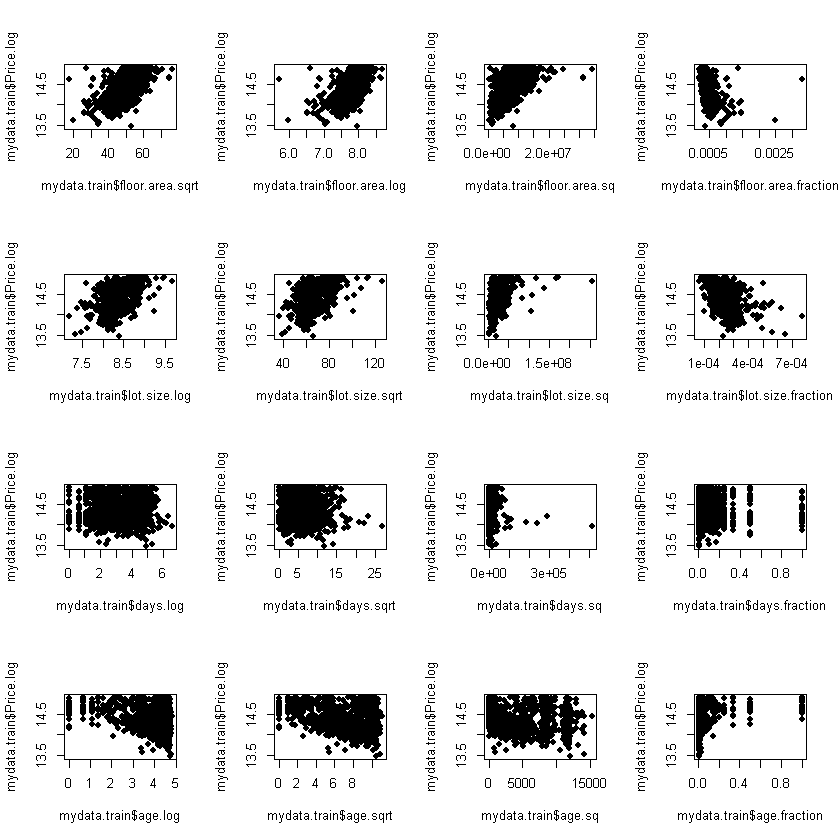

In [171]:
par(mfrow=c(4,4))

#plotting associations between the variables to select the model
plot (mydata.train$Price.log ~ mydata.train$floor.area.sqrt + mydata.train$floor.area.log + mydata.train$floor.area.sq
      + mydata.train$floor.area.fraction + mydata.train$lot.size.log + mydata.train$lot.size.sqrt + mydata.train$lot.size.sq
      + mydata.train$lot.size.fraction + mydata.train$days.log + mydata.train$days.sqrt + mydata.train$days.sq + mydata.train$days.fraction
      + mydata.train$age.log + mydata.train$age.sqrt + mydata.train$age.sq + mydata.train$age.fraction, 
         data = mydata.train, pch = 16)

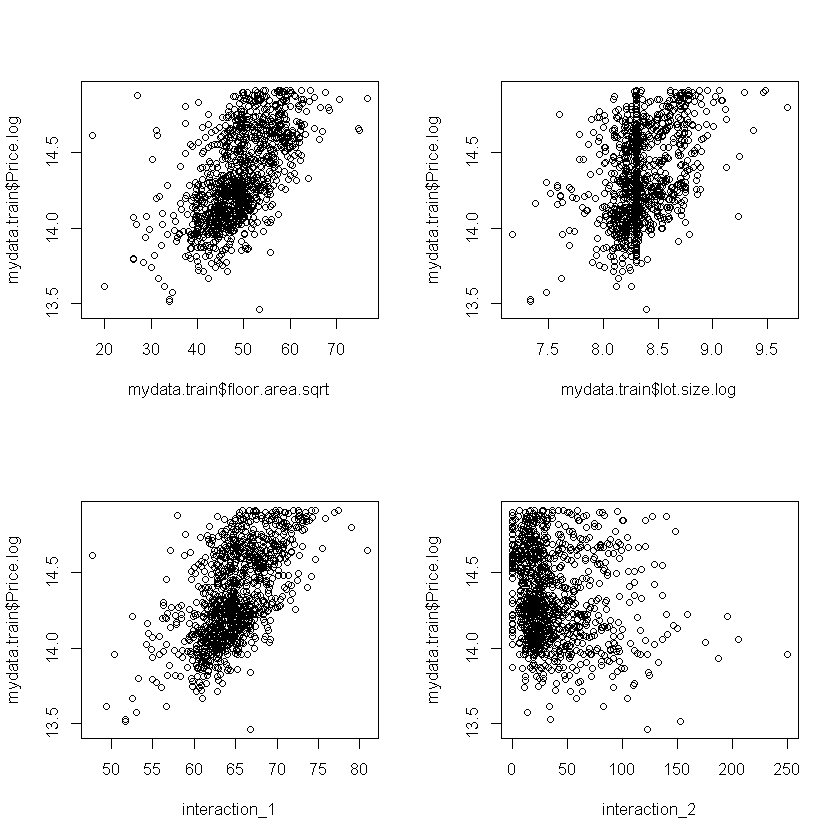

In [172]:
#scatter plot for Z7
par(mfrow=c(2,2))
interaction_1 = mydata.train$lot.size.log * mydata.train$floor.area.log
interaction_2 = mydata.train$days.sqrt * mydata.train$age.sqrt
plot(mydata.train$Price.log ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log+interaction_1 + interaction_2)

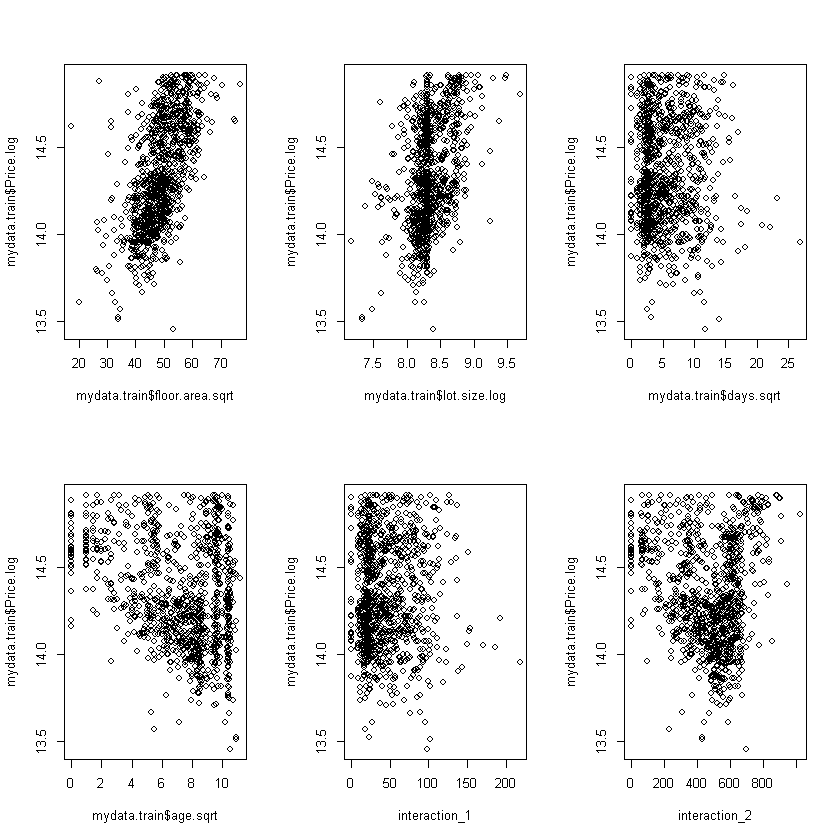

In [173]:
#scatter plot for z6
par(mfrow=c(2,3))
interaction_1 = mydata.train$lot.size.log * mydata.train$days.sqrt
interaction_2 = mydata.train$lot.size.sqrt * mydata.train$age.sqrt
plot(mydata.train$Price.log ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt
    + interaction_1
    + interaction_2)

In [174]:
# Is the form linear for each of these associations after the transformations?

There is a strong positive association between log of house price and square root of floor area .
The association between log of house price and log of lot size is moderate and positive.
There is little association between log of house price and square rate of days on market.
There is a weak negative association between log of house price and square root of house age.

### Fit your final model (1 mark for this model being appropriate for the data)

In [175]:
# Fit your final model here, use summary to get model co-efficients and other useful output:

In [176]:
summary(z6)
anova(z6)


Call:
lm(formula = mydata.train$Price.log ~ mydata.train$floor.area.sqrt + 
    mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt + 
    mydata.train$lot.size.log * mydata.train$days.sqrt + mydata.train$lot.size.log * 
    mydata.train$age.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91371 -0.17622 -0.03785  0.16952  0.93706 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                      14.579298   0.841350  17.328
mydata.train$floor.area.sqrt                      0.020046   0.001255  15.974
mydata.train$lot.size.log                        -0.132740   0.103947  -1.277
mydata.train$days.sqrt                           -0.101651   0.059474  -1.709
mydata.train$age.sqrt                            -0.345297   0.093250  -3.703
mydata.train$lot.size.log:mydata.train$days.sqrt  0.011574   0.007109   1.628
mydata.train$lot.size.log:mydata.train$age

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
mydata.train$floor.area.sqrt,1,32.9943446,32.99434464,609.826628,3.151945e-106
mydata.train$lot.size.log,1,2.7880595,2.78805949,51.531041,1.343188e-12
mydata.train$days.sqrt,1,0.2756225,0.27562254,5.094266,2.421291e-02
mydata.train$age.sqrt,1,1.7334023,1.73340230,32.038063,1.956760e-08
mydata.train$lot.size.log:mydata.train$days.sqrt,1,0.1436227,0.14362269,2.654544,1.035587e-01
mydata.train$lot.size.log:mydata.train$age.sqrt,1,0.6761575,0.67615746,12.497258,4.255763e-04
Residuals,1035,55.9981233,0.05410447,NA,NA


**Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command: (0.5 marks)**  

In [177]:
coef(z6)

(Intercept) 
                                     14.57929757 
                    mydata.train$floor.area.sqrt 
                                      0.02004622 
                       mydata.train$lot.size.log 
                                     -0.13273969 
                          mydata.train$days.sqrt 
                                     -0.10165116 
                           mydata.train$age.sqrt 
                                     -0.34529681 
mydata.train$lot.size.log:mydata.train$days.sqrt 
                                      0.01157407 
 mydata.train$lot.size.log:mydata.train$age.sqrt 
                                      0.03990891

predicted log value for house price = 
     0.0200462230032449*(sqrt of floor area)
    -0.132739692063391*(log of lot size)
    -0.101651157791524*(sqrt of days on market)
    -0.345296811747193*(sqrt of house age)
    +0.01157406557153946*(log of lot size * sqrt of days on market)
    +0.0399089062123787*(log of lot size * sqrt of house age)

    
    
    
    

**Interpret the value of each co-efficient assuming that the x-variables are independent of each other (you do not need to interpret the intercept) If you have an interaction, describe the type of interaction (reinforcement, interference): (1 mark)**    

When the square root value of floor area increases by 1, the predicted log value of house price will increase by 0.0554127116968336.
When the log value of lot size increases by 1, the predicted log value of house sale price will decrease by 0.0149593129516344.
When the square root value of days on market increases by 1, the predicted log value of house sale price will decrease by 0.0919666743081911.
When the square root value of house age increases by 1, the predicted log value of house sale price will decrease by 0.384580813772827.
The effectiveness of log of lot size increased by 0.01157406557153946 when used with sqrt of days on market compared to its use without sqrt of days on market.
The effectiveness of log of lot size increased by 0.0399089062123787 when used with sqrt of house age compared to its use without sqrt of house age.

---
## Check the assumptions (3 marks)
Create plots / conduct tests and write a sentence to interpret each result.


	Shapiro-Wilk normality test

data:  resid.values
W = 0.9791, p-value = 4.3e-11


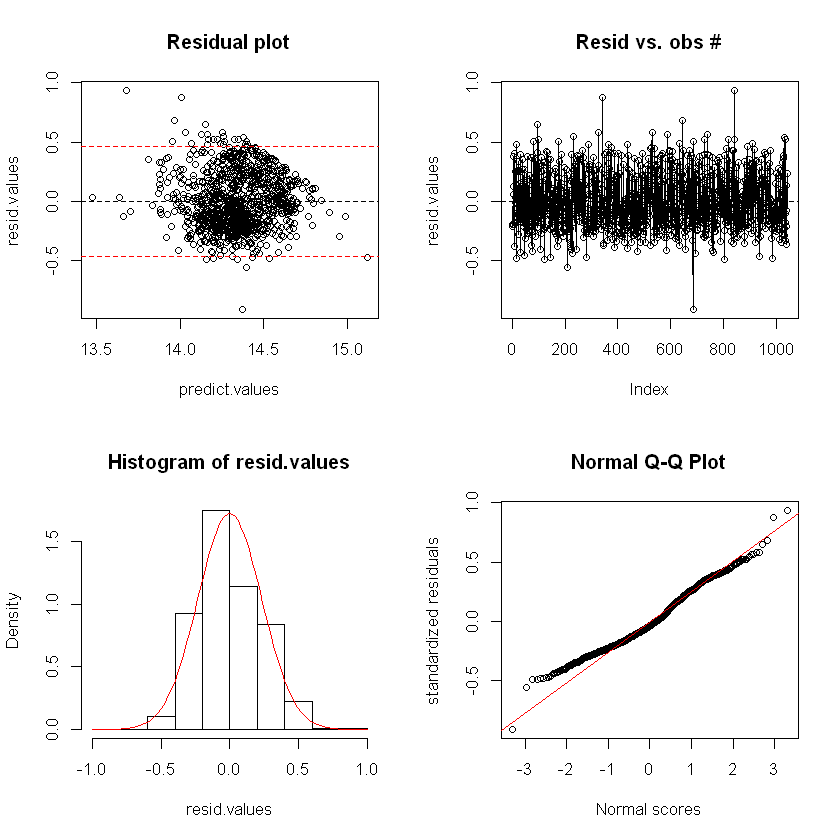

In [178]:
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.

checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}
checkresiduals(z6)


The assumption of linearity is met becasue the points are evenly distributed around y = 0 on the residual plot.
Since residuals do not fan out in a triangular fashion in residual plot, the equal variance assumption is met.
According to the histogram of the distribution of residual, the assumption of normality is generally met, since the distribution of residual is relatively normal. 

*You do not need to consider how the assumption of independence could be violated due to time.*
  
  
**Describe how the assumption of independence could be violated for this dataset in relation to space. (200 words max.) (2 marks)**  



If there are any other factors that are not described by the model but do affect house prices the assumption of independence would be violated. 
For example, some neighborhoods(such as Hastings Sunrise, South Vancouver, and Killarney)  might have a better community environment, therefore, have higher house prices than the houses in other neighborhoods. 
Generally speaking, the house price at west Vancouver is higher than that of other areas. In this case, two houses with exactly the same lot size, floor area, age, and days on market are likely to have different prices.
In addition, many buyers and sellers often use the price of a house as a reference for the other house nearby. Therefore, the selling price of a house might affect people’s expectations of the other houses nearby. In this case, the observations would be dependent. 


---
## Goodness of fit to the training set. (0.5 marks)
Find the R2 value and the residual standard error. If you transformed the y-variable, get predicted values back in the original units, then calculate these yourself.

In [179]:
summary(z6)
predicting6 <- predict(z6)
mydata.train <- cbind(mydata.train, predicting6)
mydata.train$predictorg <- exp(mydata.train$predicting6)

SSE6 <- sum((mydata.train$Price - mydata.train$predictorg)^2)
SSY6 <- sum((mydata.train$Price - mean(mydata.train$Price))^2)

n = nrow(mydata)
m = summary(z6)$df[2]
denom = n - m - 1
denom

Residual.SE6 = sqrt(SSE6/denom)
round(Residual.SE6,3)

pseudo.R2 = 1- SSE6/SSY6
round(pseudo.R2,3)


Call:
lm(formula = mydata.train$Price.log ~ mydata.train$floor.area.sqrt + 
    mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt + 
    mydata.train$lot.size.log * mydata.train$days.sqrt + mydata.train$lot.size.log * 
    mydata.train$age.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91371 -0.17622 -0.03785  0.16952  0.93706 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                      14.579298   0.841350  17.328
mydata.train$floor.area.sqrt                      0.020046   0.001255  15.974
mydata.train$lot.size.log                        -0.132740   0.103947  -1.277
mydata.train$days.sqrt                           -0.101651   0.059474  -1.709
mydata.train$age.sqrt                            -0.345297   0.093250  -3.703
mydata.train$lot.size.log:mydata.train$days.sqrt  0.011574   0.007109   1.628
mydata.train$lot.size.log:mydata.train$age

[1] 266

[1] 836010.6

[1] 0.384

R^2 for the model we choose is 0.4081.
The residual standard error for this model is 836010.649 and the Pseudo R-squared value is 0.384

---
## Do you have any concerns about the explanatory variables being related to each other? (1 mark)

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model? How would this affect your predictions?  

In [200]:
library(car)

In [201]:
VIF <- vif(z6)
VIF

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif


floor.area.sqrt           lot.size.log              days.sqrt 
              1.539013              14.496120             945.767217 
              age.sqrt lot.size.log:days.sqrt  lot.size.log:age.sqrt 
           1348.784578             956.065042            1368.983911

VIF values or Variation Inflation Factors show us the extent of multi-collinearity, in a multiple linear regression model. Multicollinearity indicates the influence of one explanatory variable on the other. Having high VIF values could indicate that some of the variables are influencing other variables. This can affect the predictions in the sense that, the model could end up double-counting the effect of a few variables, hence, creating an illusion of good fit.

---
<a id="Hyp_tests"></a>
## Hypothesis tests (1.5 marks)

Conduct an F-test for the significance of the regression and t-tests for the significance of each variable. If you have an interaction in your model, show only the test for the interaction (do not test the main effects).  
Write the concluding sentence for each hypothesis test, then in brackets include the test statistic and a p-value). Use alpha = 0.05 to make all decisions for this project.  
E.g.: The variable log baha is significant in the final model (t statistic = 15.32, df error = 38, p-value < 0.0001).

What do these results tell you about the contribution of each variable to your final model?

In [182]:
anova(z6,test='f')
summary(z6)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
mydata.train$floor.area.sqrt,1,32.9943446,32.99434464,609.826628,3.151945e-106
mydata.train$lot.size.log,1,2.7880595,2.78805949,51.531041,1.343188e-12
mydata.train$days.sqrt,1,0.2756225,0.27562254,5.094266,2.421291e-02
mydata.train$age.sqrt,1,1.7334023,1.73340230,32.038063,1.956760e-08
mydata.train$lot.size.log:mydata.train$days.sqrt,1,0.1436227,0.14362269,2.654544,1.035587e-01
mydata.train$lot.size.log:mydata.train$age.sqrt,1,0.6761575,0.67615746,12.497258,4.255763e-04
Residuals,1035,55.9981233,0.05410447,NA,NA



Call:
lm(formula = mydata.train$Price.log ~ mydata.train$floor.area.sqrt + 
    mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt + 
    mydata.train$lot.size.log * mydata.train$days.sqrt + mydata.train$lot.size.log * 
    mydata.train$age.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91371 -0.17622 -0.03785  0.16952  0.93706 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                      14.579298   0.841350  17.328
mydata.train$floor.area.sqrt                      0.020046   0.001255  15.974
mydata.train$lot.size.log                        -0.132740   0.103947  -1.277
mydata.train$days.sqrt                           -0.101651   0.059474  -1.709
mydata.train$age.sqrt                            -0.345297   0.093250  -3.703
mydata.train$lot.size.log:mydata.train$days.sqrt  0.011574   0.007109   1.628
mydata.train$lot.size.log:mydata.train$age

### F-test results
1. The variable floor.area.sqrt is significant with an F-value of 609.82
2. Some of the other variables that are significant based on their F-values are Log of Lot size, Sqrt. of age and the interaction between lot size log and age sqrt

### T-test results
1. The t-values of floor.area.sqrt, lot.size.log and age.sqrt are significant with values 17.328, 15.974 and 3.6 respectively.
2. The p-values also indicate a similar result with the p-values being very small (indicating good results) for floor.area.sqrt, lot.size.log and age.sqrt.

---
<a id="Prediction"></a>
## Using the model for prediction (1 mark)

Generate predicted values using the **validation set data** as input in the final model. Make sure that you are still using the model that was fit to the training set data, and only using the test set data as new x-values.

Calculate the mean absolute error (MAE) and root mean squared error (root MSE) for the validation set.
If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

In [219]:
# Include your code here
mydata.valid$days.log <- log(mydata.valid$Days +1)
mydata.valid$floor.area.log <- log(mydata.valid$Total.floor.area)
mydata.valid$age.log <- log(mydata.valid$Age + 1)
mydata.valid$lot.size.log <- log(mydata.valid$Lot.Size)

mydata.valid$days.sqrt <- sqrt(mydata.valid$Days)
mydata.valid$floor.area.sqrt <- sqrt(mydata.valid$Total.floor.area)
mydata.valid$age.sqrt <- sqrt(mydata.valid$Age)
mydata.valid$lot.size.sqrt <- sqrt(mydata.valid$Lot.Size)

mydata.valid$days.sq <- (mydata.valid$Days)^2
mydata.valid$floor.area.sq <- (mydata.valid$Total.floor.area)^2
mydata.valid$age.sq <- (mydata.valid$Age)^2
mydata.valid$lot.size.sq <- (mydata.valid$Lot.Size)^2 

mydata.valid$days.fraction <- 1/(mydata.valid$Days)
mydata.valid$floor.area.fraction <- 1/(mydata.valid$Total.floor.area)
mydata.valid$age.fraction <- 1/(mydata.valid$Age)
mydata.valid$lot.size.fraction <- 1/(mydata.valid$Lot.Size)

mydata.valid$Price.log <- log(mydata.valid$Price)

#back-transforming the y-variable to get accurate results
predict.price <- exp(predict(z6, newdata=mydata.valid))
predict.price

1043      1044      1045      1046      1047      1048      1049      1050 
1735527.8 1374462.3 1918900.4 1383847.1 1868526.8 1492507.3 1430830.1 1607660.1 
     1051      1052      1053      1054      1055      1056      1057      1058 
1470643.3 2104231.5 1999923.5 1603178.5 1628618.7 1812353.6 3949296.6 1851958.8 
     1059      1060      1061      1062      1063      1064      1065      1066 
1624607.4 1600242.6 1942026.7  980694.9 1701972.3 1668509.0 1841810.0 2199332.4 
     1067      1068      1069      1070      1071      1072      1073      1074 
1685561.4 2241013.7 1429217.8 1628164.5 1299173.9 1403375.6 1119590.3 2171962.3 
     1075      1076      1077      1078      1079      1080      1081      1082 
1655422.4 1929116.8 1777821.0 1667968.5 1991891.4 1646855.0 1136062.7 1516916.5 
     1083      1084      1085      1086      1087      1088      1089      1090 
1019101.4 2262760.7 1657972.7 1499139.9 1775575.1 1970962.9 1574887.2 1317658.8 
     1091      1092      1093      1094      1095      1096      1097      1098 
1299912.1 1830722.0 1902900.1 1337600.2 1726081.5 2080036.8 1354740.4 1587170.1 
     1099      1100      1101      1102      1103      1104      1105      1106 
1738904.7 1314137.1 1665273.0 1779217.4 1700138.3 1356773.8 1997253.6 1257860.2 
     1107      1108      1109      1110      1111      1112      1113      1114 
1434054.6 1660642.4 1928293.2 1549204.3 2265709.3 1902661.2 2453695.4 2019965.2 
     1115      1116      1117      1118      1119      1120      1121      1122 
1476165.2 1703228.3 2285914.7 2261877.3 2371326.3 1750556.8 1227139.2 1382049.0 
     1123      1124      1125      1126      1127      1128      1129      1130 
2310605.4 1311814.7 1897313.8 1903872.7 1540902.7 1733249.1 1632345.9 1321150.2 
     1131      1132      1133      1134      1135      1136      1137      1138 
1275690.1 2249490.6 1641040.3 1663061.0 1336589.9 1699216.7 1584518.3 1604719.3 
     1139      1140      1141      1142      1143      1144      1145      1146 
1635682.9 1327215.3 1706662.0 1655725.6 1448010.8 1505993.7 1535066.2 1559363.5 
     1147      1148      1149      1150      1151      1152      1153      1154 
2346242.3 1679179.2 1432175.9 1922836.7 1549124.8 1895014.6 1446441.1 2018226.5 
     1155      1156      1157      1158      1159      1160      1161      1162 
1537386.5 2267430.8 1582374.6 1354169.3 1753614.2 1835128.5 1498149.0 1901761.0 
     1163      1164      1165      1166      1167      1168      1169      1170 
1237539.9 1797651.6 1714595.0 1428280.5 2096042.1 1657066.3 1446025.2 2018066.8 
     1171      1172      1173      1174      1175      1176      1177      1178 
2712476.2 1653588.8 2269346.5 2111824.5 1474465.1 1768094.9 2532016.2 1358580.8 
     1179      1180      1181      1182      1183      1184      1185      1186 
1773557.4 1587155.1 1734889.7 1999904.3 1951549.5 1617187.7 2594930.1 1724156.6 
     1187      1188      1189      1190      1191      1192      1193      1194 
1814608.5 1802153.3 1414161.0 1794511.4 2721808.4 1192731.8 1117251.9 1603025.7 
     1195      1196      1197      1198      1199      1200      1201      1202 
1646450.7 2270091.2 1103685.2 1772296.3 1893679.3 1764556.2 1982543.5 1698631.1 
     1203      1204      1205      1206      1207      1208      1209      1210 
1555640.3 1331651.8 1945346.9 1680093.7 1371013.8 1571732.8 1515948.9 1739240.1 
     1211      1212      1213      1214      1215      1216      1217      1218 
1468505.8 1530143.3 1570190.3 1957139.9 1604375.9 1592113.1 1541808.5 2251639.9 
     1219      1220      1221      1222      1223      1224      1225      1226 
2406832.4 1929528.1 1416579.1 1658523.6 1780510.6 1502728.8 2044261.7 1813874.9 
     1227      1228      1229      1230      1231      1232      1233      1234 
2032746.6 1563710.3 2061685.4 2289620.8 1767371.7 2311839.3 1572566.2 1884988.3 
     1235      1236      1237      1238      1239      1240      1241      1242 
2067016.7 1852106.1 1690414.8 265680

In [220]:
mydata.valid2 <- as.data.frame(cbind(mydata.valid, predict.price))
head(mydata.valid2)

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,days.log,...,age.sq,lot.size.sq,days.fraction,floor.area.fraction,age.fraction,lot.size.fraction,Price.log,pred2,pred3,predict.price
1043,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,3.7841896,...,2809,15681600,0.023255814,0.0003773585,0.01886792,0.0002525253,14.08859,1836188,1805593,1735528
1044,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,2.7080502,...,8281,16208676,0.071428571,0.0006112469,0.01098901,0.0002483855,14.59254,1434501,1447124,1374462
1045,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,4.9836066,...,49,17015625,0.006896552,0.0003373819,0.14285714,0.0002424242,14.48334,1962726,2050708,1918900
1046,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,0.6931472,...,5041,20340100,1.000000000,0.0006915629,0.01408451,0.0002217295,14.00613,1389088,1437464,1383847
1047,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,3.8712010,...,2304,23474025,0.021276596,0.0003594536,0.02083333,0.0002063983,14.12300,1965782,1931640,1868527
1048,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,2.1972246,...,4356,16208676,0.125000000,0.0005330490,0.01515152,0.0002483855,14.13759,1540597,1549357,1492507


In [221]:
mydata.valid2$errors.price <- mydata.valid2$Price - mydata.valid2$predict.price

In [222]:
RMSE.price <- sqrt(sum(mydata.valid2$errors.price^2)/nrow(mydata.valid2)); RMSE.price
MAE.price <- sum(abs(mydata.valid2$errors.price))/nrow(mydata.valid2); MAE.price

[1] 442772.5

[1] 350556.7

---
<a id="Compare"></a>
## Comparing to other candidate models (1 mark for models A and B being appropriate for the data)
Compare the MAE and root MSE (for the validation set) from your final model to these values for at least two other candidate models (include the code for these models at the end of this notebook). If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

Include your results in the table below (add more rows if you would like):

| Model | MAE | root MSE | model statement|
|------|------|------|------|
| Final model | 350556 | 442772 | Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + age.sqrt+lot.size.log * days.sqrt+lot.size.log * age.sqrt|
| Model A | 1759590 | 1850450 | Price.log ~ floor.area.sqrt + lot.size.log + days.sqrt + age.sqrt+floor.area.sqrt * lot.size.log+floor.area.sqrt * days.sqrt+floor.area.sqrt*age.sqrt+lot.size.log * days.sqrt+lot.size.log * age.sqrt+days.sqrt * age.sqrt |
| Model B | 370727 | 453915 | Price ~ Total.floor.area + Lot.Size + Days.on.market +  Age |

**Write the model statement (which you used in the lm function) for each of your candidate models by replacing the model statements in the table above. Make it clear how each variable was transformed.**  



In [223]:
#for model Z5
predict.price2 <- predict(z5, newdata=mydata.valid)
mydata.valid3 <- as.data.frame(cbind(mydata.valid, predict.price2))
mydata.valid3$errors.price2 <- mydata.valid3$Price - mydata.valid3$predict.price2
RMSE.price2 <- sqrt(sum(mydata.valid3$errors.price2^2)/nrow(mydata.valid3)); RMSE.price2
MAE.price2 <- sum(abs(mydata.valid3$errors.price2))/nrow(mydata.valid3); MAE.price2

[1] 1850450

[1] 1759590

In [227]:
#for model Z4
predict.price3 <- predict(z4, newdata=mydata.valid)
mydata.valid4 <- as.data.frame(cbind(mydata.valid, predict.price3))
mydata.valid4$errors.price3 <- mydata.valid4$Price - mydata.valid4$predict.price3
RMSE.price3 <- sqrt(sum(mydata.valid4$errors.price3^2)/nrow(mydata.valid4)); RMSE.price3
MAE.price3 <- sum(abs(mydata.valid4$errors.price3))/nrow(mydata.valid4); MAE.price3

[1] 453915

[1] 370727.2

---
<a id="Discussion"></a>
# Discussion (400 words max.) (6 marks)
How well does your final model address the goal of the analysis? What are the strengths and limitations of your final model? What are some recommendations to address the limitations of your final model?  
If you include any references, please put the bibliographical information (APA style) at the end of your discussion; this does not contribute to the word count.


### Final model addressing the goals of the analysis
Our final model (z6) addresses a variety of factors needed for a linear regression model to be successful- the most important one of them being- achieving linearity. Our model takes into consideration only the best transformed variables. We considered the association of various explanatory variables, with and without transformations- ensuring that we had exhaustively and carefully checked for the linearity. Our model, hence, address the goal of the analysis which is to ensure that we get the best fitted regression line, which is neither over nor under fitted.

### Strengths of our model
1.	The higher the R-squared value, the better the model as the R-squared value represents goodness of fit. There is a stronger correlation when there is a higher r-squared value. Our model has a ~0.41 R-squared value which makes it a good regression model.
2.	When are talking about multi-collinearity, we should also talk about the pseudo-R squared value. A value between 0.2 and 0.4 [1] for a linear regression model is considered to be an excellent fit. Our model has a pseudo-R squared of 0.384, suggesting great fit.
3.	Our model has a low Mean Absolute Error and Root Mean Squared Error (MAE and RMSE) values, as compared to our other candidate models as well. Post prediction, we again checked our MAE and RMSE values against the predicted data values and our model outperforms other candidate models, even here

### Limitations of our model
Our model uses a plethora of transformations to achieve its success. For example, we have transformed our response variable, Price, in a log transformation. When looking at the predictions, we need to be careful in back transforming the variable by taking an exponential, so we get the accurate results. Because of such transformations, we have introduced complexity in our model and when using the model, it can feel tricky to use some of the variables. It might also be complex to understand, on the face of it, why some transformations are made the way they are, without having prior knowledge of the other candidate models.


##### References
##### [1]: https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation

---
<a id="Transformations"></a>
# Visualizing appropriate transformations (1 mark)


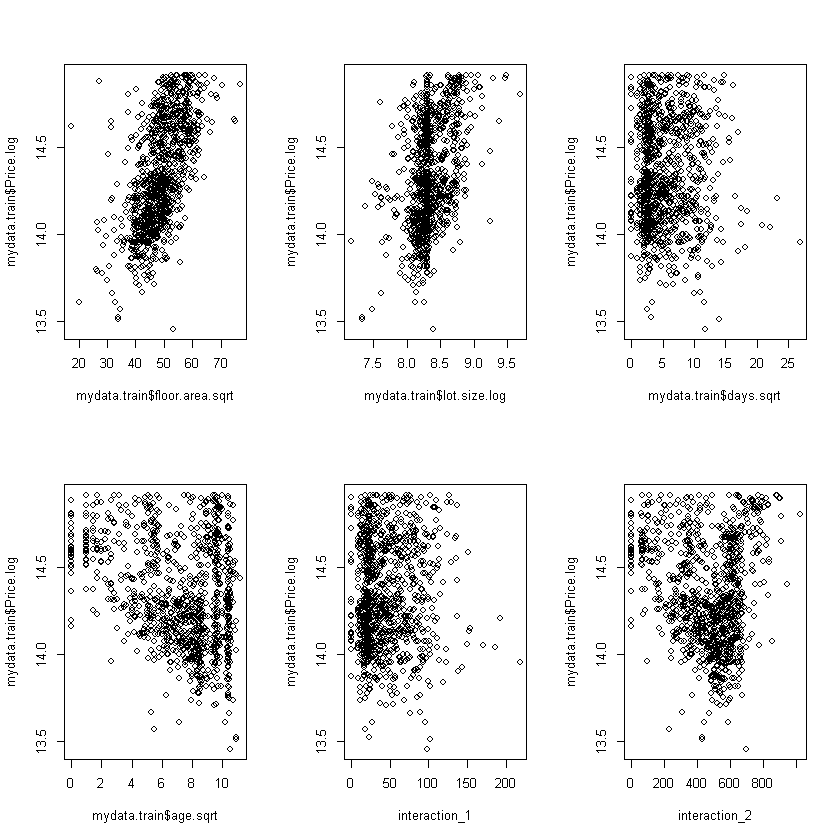

In [231]:
# Include the code for visualizing appropriate transformations of the variables here
#scatter plot for final model
par(mfrow=c(2,3))
interaction_1 = mydata.train$lot.size.log * mydata.train$days.sqrt
interaction_2 = mydata.train$lot.size.sqrt * mydata.train$age.sqrt
plot(mydata.train$Price.log ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt
    + interaction_1
    + interaction_2)


---
<a id="Other_models"></a>
# Other candidate models (3 marks)

In [232]:
# Include the code for your other candidate models here.

# Some of the other candidate models we took into consideration, are given below:

# Candidate 1
z1 <- lm(mydata.train$Price ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log, data = mydata.train)
# Candidate 2
z2 <- lm(mydata.train$Price ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log + mydata.train$floor.area.sqrt*mydata.train$lot.size.log, data = mydata.train)
# Candidate 3
z3 <- lm(mydata.train$Price ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log + mydata.train$days.sq +  mydata.train$age.sqrt 
         + mydata.train$floor.area.sqrt*mydata.train$lot.size.log
         + mydata.train$lot.size.log   *mydata.train$days.sq
         + mydata.train$age.sqrt       *mydata.train$floor.area.sqrt
         + mydata.train$age.sqrt       *mydata.train$lot.size.log
         + mydata.train$age.sqrt       * mydata.train$days.sqrt, 
         data = mydata.train)
# Candidate 4
z4 <- lm(mydata.train$Price ~ mydata.train$Total.floor.area + mydata.train$Lot.Size + mydata.train$Days +  mydata.train$Age, 
         data = mydata.train)
# Candidate 5
z5 <- lm(mydata.train$Price.log ~ mydata.train$floor.area.sqrt + mydata.train$lot.size.log + mydata.train$days.sqrt + mydata.train$age.sqrt
         +mydata.train$floor.area.sqrt * mydata.train$lot.size.log
         +mydata.train$floor.area.sqrt * mydata.train$days.sqrt
         +mydata.train$floor.area.sqrt*mydata.train$age.sqrt
         +mydata.train$lot.size.log * mydata.train$days.sqrt
         +mydata.train$lot.size.log * mydata.train$age.sqrt
         +mydata.train$days.sqrt * mydata.train$age.sqrt, 
         data = mydata.train)



## Thank You!